### 1. Importing Libaries

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

import optuna

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", palette="muted", color_codes=True)
sns.set_style('ticks')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### 2. Getting Data

In [2]:
train = pd.read_csv(r'Data/train.csv', index_col='id')
test = pd.read_csv(r'Data/test.csv', index_col='id')
sample_submission = pd.read_csv(r'Data/sample_submission.csv')

### 3. EDA

<b>3.1 General Analysis</b>

In [3]:
print('Rows and Columns in train dataset:', train.shape)
print('Rows and Columns in test dataset:', test.shape)

Rows and Columns in train dataset: (300000, 15)
Rows and Columns in test dataset: (200000, 14)


In [4]:
train.head()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
id,,,,,,,,,,,,,,,
1,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043
3,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
4,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091
5,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528,6.957716
8,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772,7.951046


In [5]:
test.head()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
id,,,,,,,,,,,,,,
0,0.353600,0.738780,0.600939,0.293377,0.285691,0.458006,0.620704,0.422249,0.369203,0.435727,0.550540,0.699134,0.286864,0.364515
2,0.907222,0.189756,0.215531,0.869915,0.301333,0.528958,0.390351,0.521112,0.794779,0.798580,0.446475,0.449037,0.916964,0.513002
6,0.179287,0.355353,0.623972,0.437812,0.282476,0.320826,0.386789,0.776422,0.222268,0.229102,0.211913,0.222651,0.327164,0.827941
7,0.359385,0.181049,0.551368,0.206386,0.280763,0.482076,0.506677,0.362793,0.379737,0.345686,0.445276,0.518485,0.299028,0.598166
10,0.335791,0.682607,0.676481,0.219465,0.282861,0.581721,0.748639,0.350158,0.448915,0.506878,0.817721,0.805895,0.790591,0.249275


In [6]:
print('Missing value in train dataset:', sum(train.isnull().sum()))
print('Missing value in test dataset:', sum(test.isnull().sum()))

Missing value in train dataset: 0
Missing value in test dataset: 0


                                               Train dataset information

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 1 to 499999
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   cont1   300000 non-null  float64
 1   cont2   300000 non-null  float64
 2   cont3   300000 non-null  float64
 3   cont4   300000 non-null  float64
 4   cont5   300000 non-null  float64
 5   cont6   300000 non-null  float64
 6   cont7   300000 non-null  float64
 7   cont8   300000 non-null  float64
 8   cont9   300000 non-null  float64
 9   cont10  300000 non-null  float64
 10  cont11  300000 non-null  float64
 11  cont12  300000 non-null  float64
 12  cont13  300000 non-null  float64
 13  cont14  300000 non-null  float64
 14  target  300000 non-null  float64
dtypes: float64(15)
memory usage: 36.6 MB


In [8]:
train.describe()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,0.506873,0.497898,0.521557,0.515683,0.502022,0.526515,0.487890,0.525163,0.459857,0.520532,0.483926,0.506877,0.553442,0.503713,7.905661
std,0.203976,0.228159,0.200770,0.233035,0.220701,0.217909,0.181096,0.216221,0.196685,0.201854,0.220082,0.218947,0.229730,0.208238,0.733071
min,-0.082263,-0.031397,0.020967,0.152761,0.276377,0.066166,-0.097666,0.217260,-0.240604,-0.085046,0.083277,0.088635,0.029950,0.166367,0.000000
25%,0.343078,0.319170,0.344096,0.294935,0.284108,0.356163,0.346600,0.341486,0.330832,0.375465,0.300474,0.310166,0.350472,0.308673,7.329367
50%,0.484005,0.553209,0.551471,0.482880,0.451733,0.470988,0.466825,0.483460,0.416843,0.458877,0.441916,0.486599,0.487707,0.431845,7.940571
75%,0.643789,0.731263,0.648315,0.748705,0.670660,0.694043,0.581292,0.685250,0.575041,0.700292,0.679128,0.694453,0.768479,0.712653,8.470084
max,1.016227,0.859697,1.006955,1.010402,1.034261,1.043858,1.066167,1.024427,1.004114,1.199951,1.022620,1.049025,0.977845,0.868506,10.267569


                                               Test dataset information

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 499990
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   cont1   200000 non-null  float64
 1   cont2   200000 non-null  float64
 2   cont3   200000 non-null  float64
 3   cont4   200000 non-null  float64
 4   cont5   200000 non-null  float64
 5   cont6   200000 non-null  float64
 6   cont7   200000 non-null  float64
 7   cont8   200000 non-null  float64
 8   cont9   200000 non-null  float64
 9   cont10  200000 non-null  float64
 10  cont11  200000 non-null  float64
 11  cont12  200000 non-null  float64
 12  cont13  200000 non-null  float64
 13  cont14  200000 non-null  float64
dtypes: float64(14)
memory usage: 22.9 MB


In [10]:
test.describe()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.507222,0.498080,0.521381,0.514801,0.502274,0.526987,0.487722,0.525284,0.460257,0.520478,0.484187,0.506763,0.554390,0.503174
std,0.204220,0.227866,0.200656,0.232995,0.220812,0.218145,0.180805,0.216084,0.197217,0.201645,0.219972,0.218598,0.229730,0.208333
min,-0.061638,-0.030548,0.040867,0.153318,0.276679,0.075104,-0.024760,0.219631,-0.231308,-0.109759,0.078859,0.094504,0.015367,0.164500
25%,0.343649,0.322703,0.344251,0.294361,0.284113,0.356357,0.347336,0.342148,0.330739,0.375496,0.301236,0.310875,0.350956,0.308210
50%,0.484292,0.553147,0.551413,0.482019,0.451960,0.471000,0.466392,0.483781,0.416900,0.458622,0.442037,0.485527,0.491538,0.431124
75%,0.644079,0.686518,0.648656,0.747133,0.670831,0.694422,0.580666,0.685070,0.575248,0.700157,0.677691,0.694630,0.769323,0.712664
max,1.017577,0.853813,1.001791,0.997446,1.033722,1.046715,1.054225,1.026280,1.001405,1.140639,1.023151,1.049417,0.977223,0.868679


<b>3.2 Features and Target Distribution</b>

                                                    Train dataset

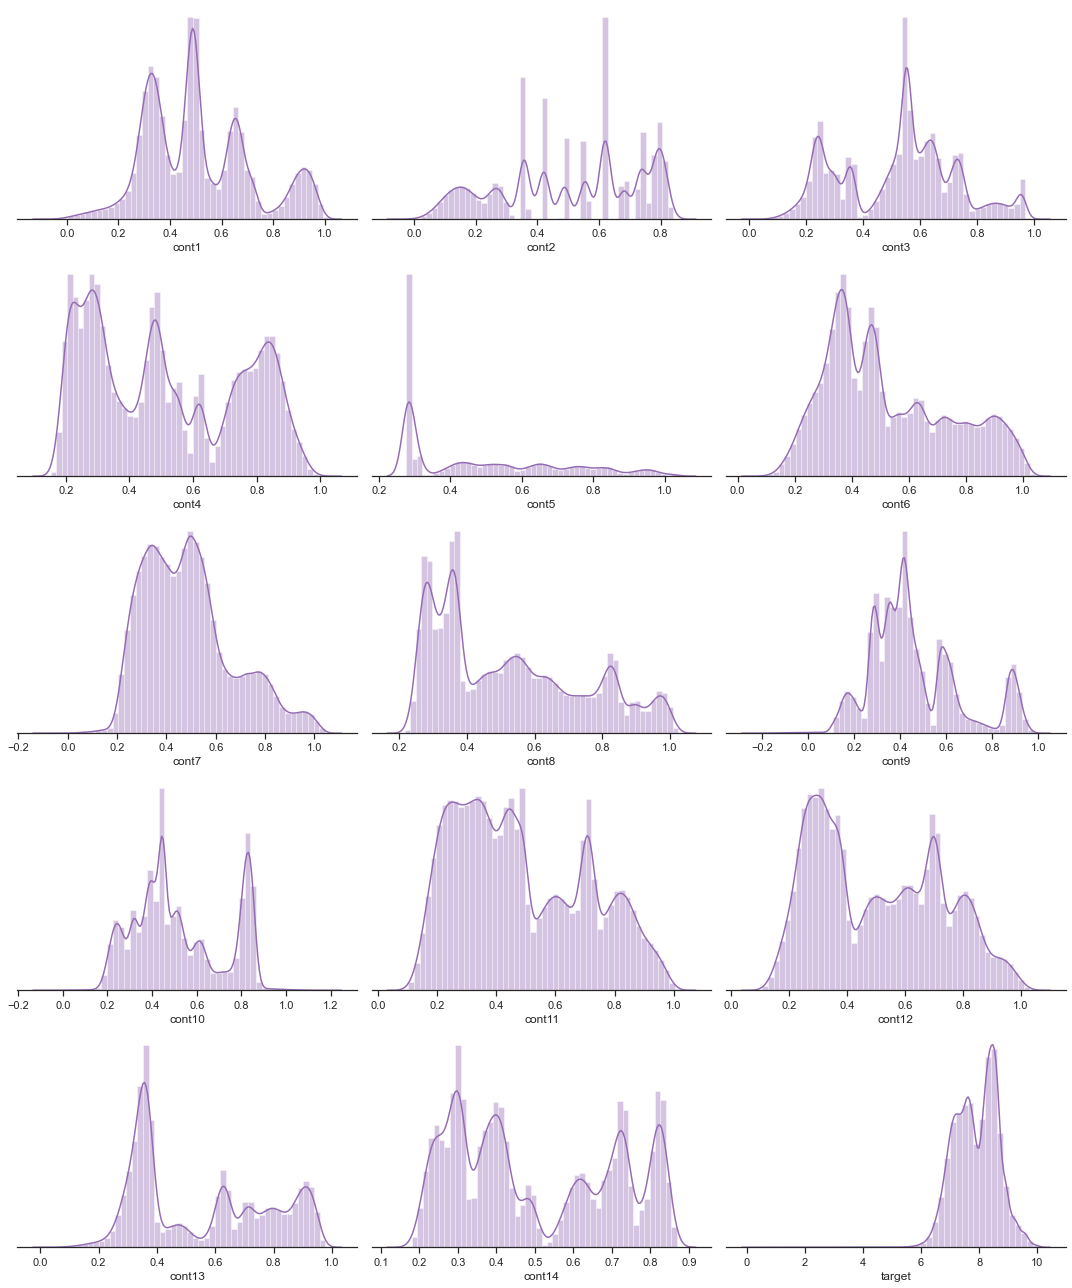

In [11]:
plt.figure(figsize = (15, 18))

for i in range(len(train.columns)):
    plt.subplot(5, 3, i+1)
    sns.despine(left=True)
    sns.distplot(train[train.columns[i]], color='m')
    plt.yticks([])
    plt.ylabel('')
       
plt.tight_layout()

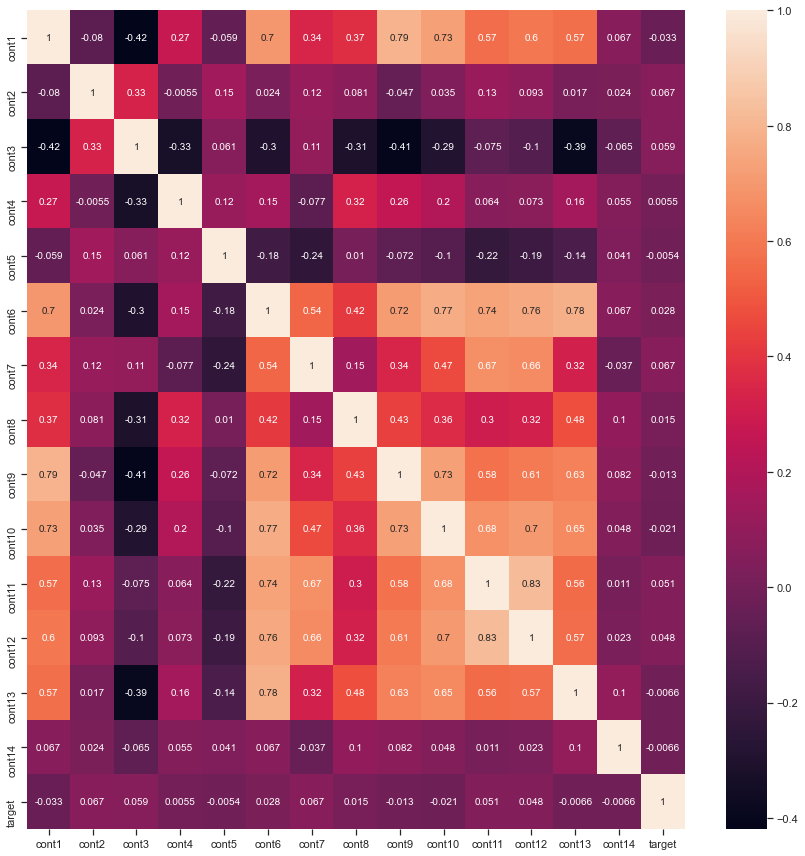

In [12]:
fig, axes = plt.subplots(figsize = (12, 12))

sns.heatmap(train.corr(), annot= True)

plt.tight_layout()

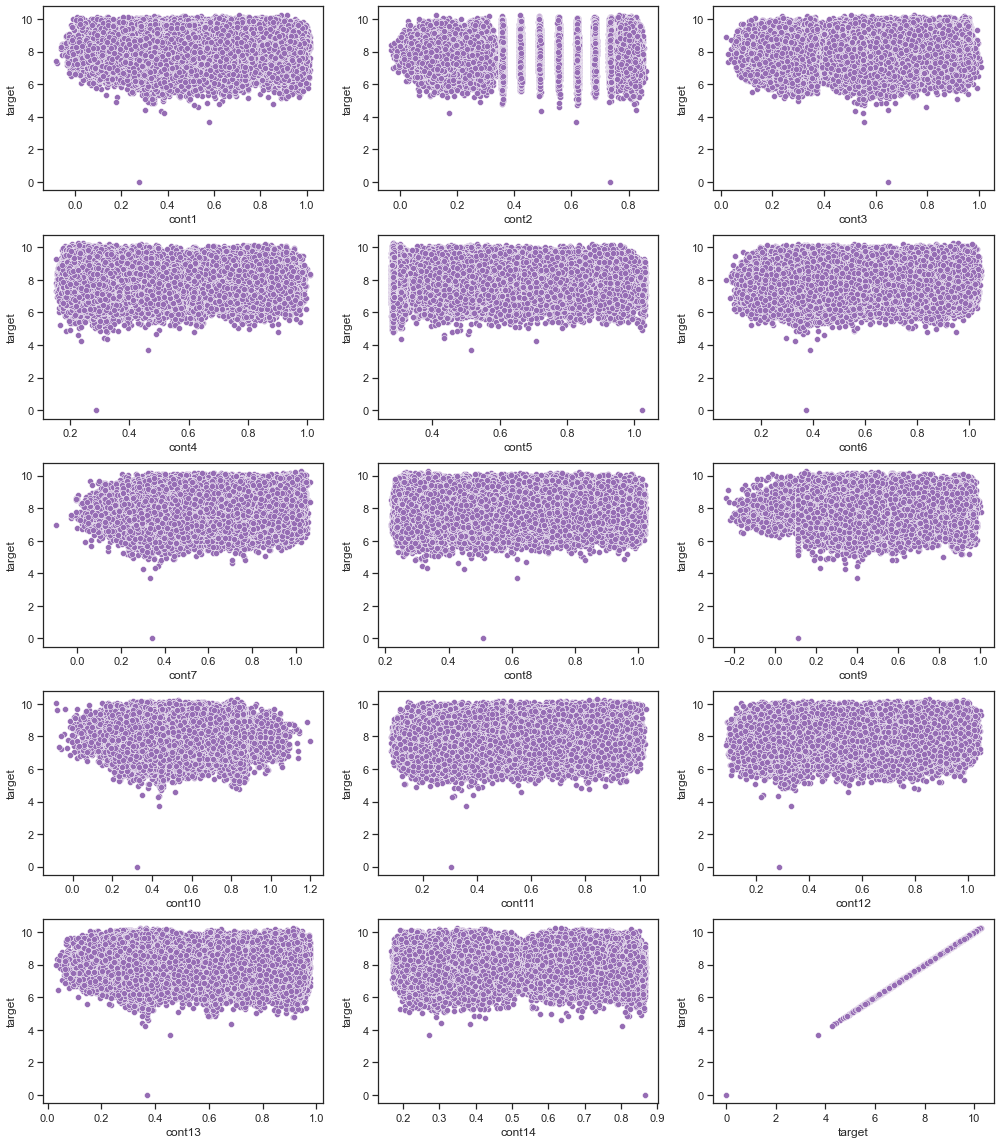

In [13]:
plt.figure(figsize = (14,16))

for i in range(len(train.columns)):
    plt.subplot(5,3,i+1)
#     sns.despine(left=True)
#     plt.yticks([])
#     plt.ylabel('')
    sns.scatterplot(x = train.columns[i], y = 'target', data = train, color = 'm')
    
plt.tight_layout()

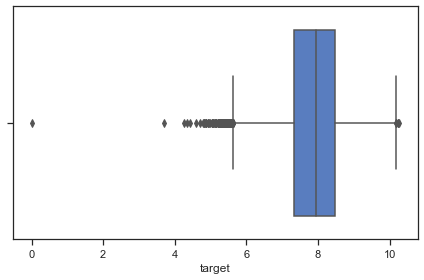

In [17]:
sns.boxplot(train.target)

plt.tight_layout()

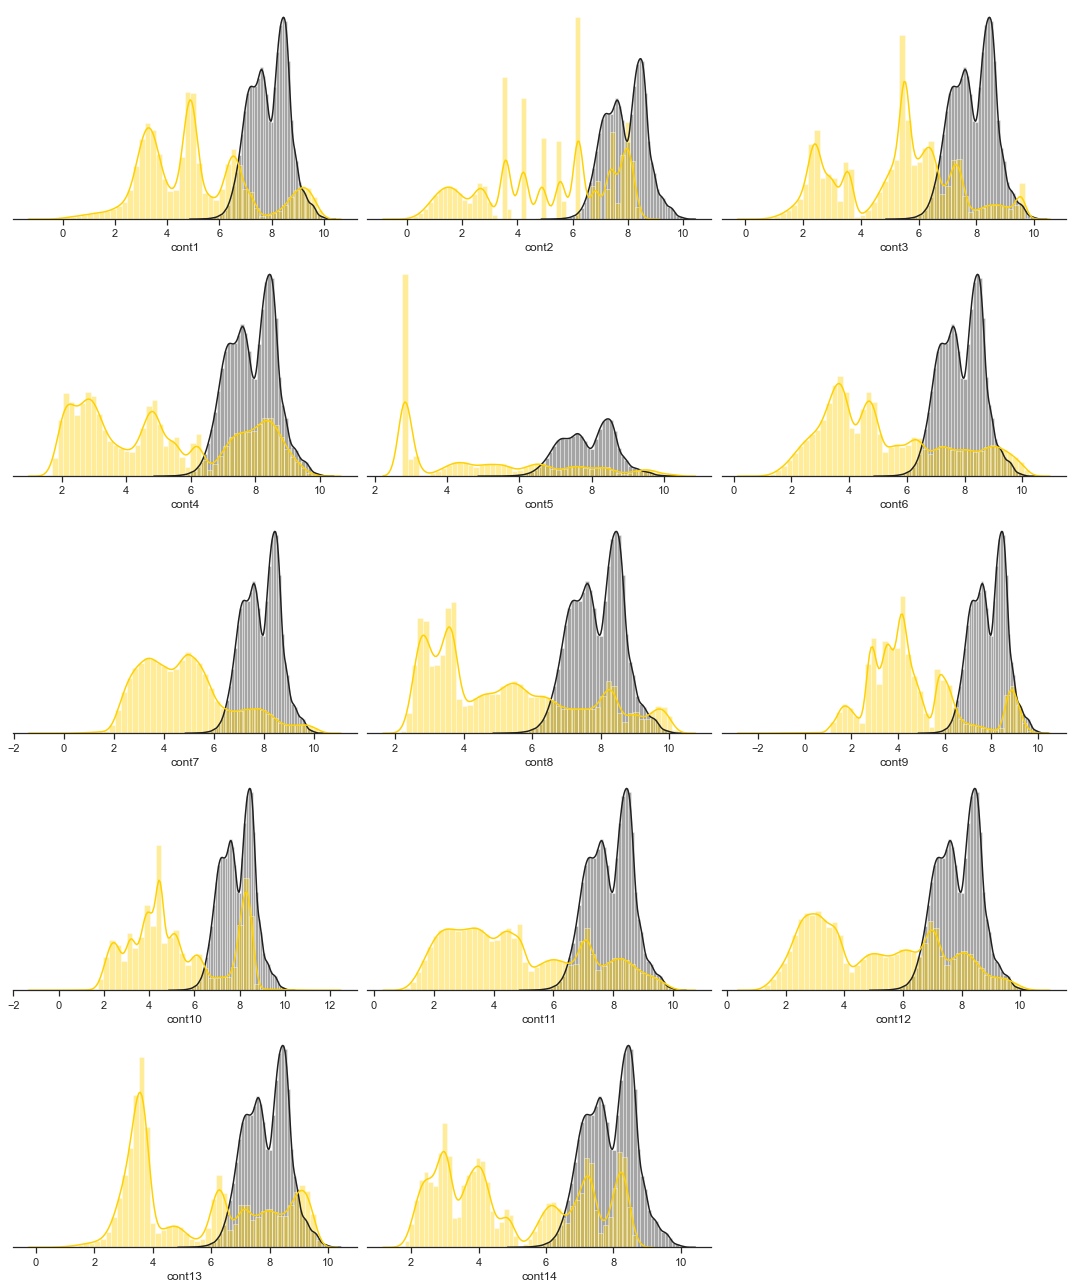

In [15]:
plt.figure(figsize = (15, 18))

for i in range(len(train.drop('target', axis=1).columns)):
    plt.subplot(5, 3, i+1)
    sns.distplot(train[train['target'] > 5].target, color='#202020')
    sns.distplot(train[train.columns[i]] * 10, color='#ffd100')
    sns.despine(left=True)
    plt.yticks([])
    plt.ylabel('')
       
plt.tight_layout()

                                                    Test dataset

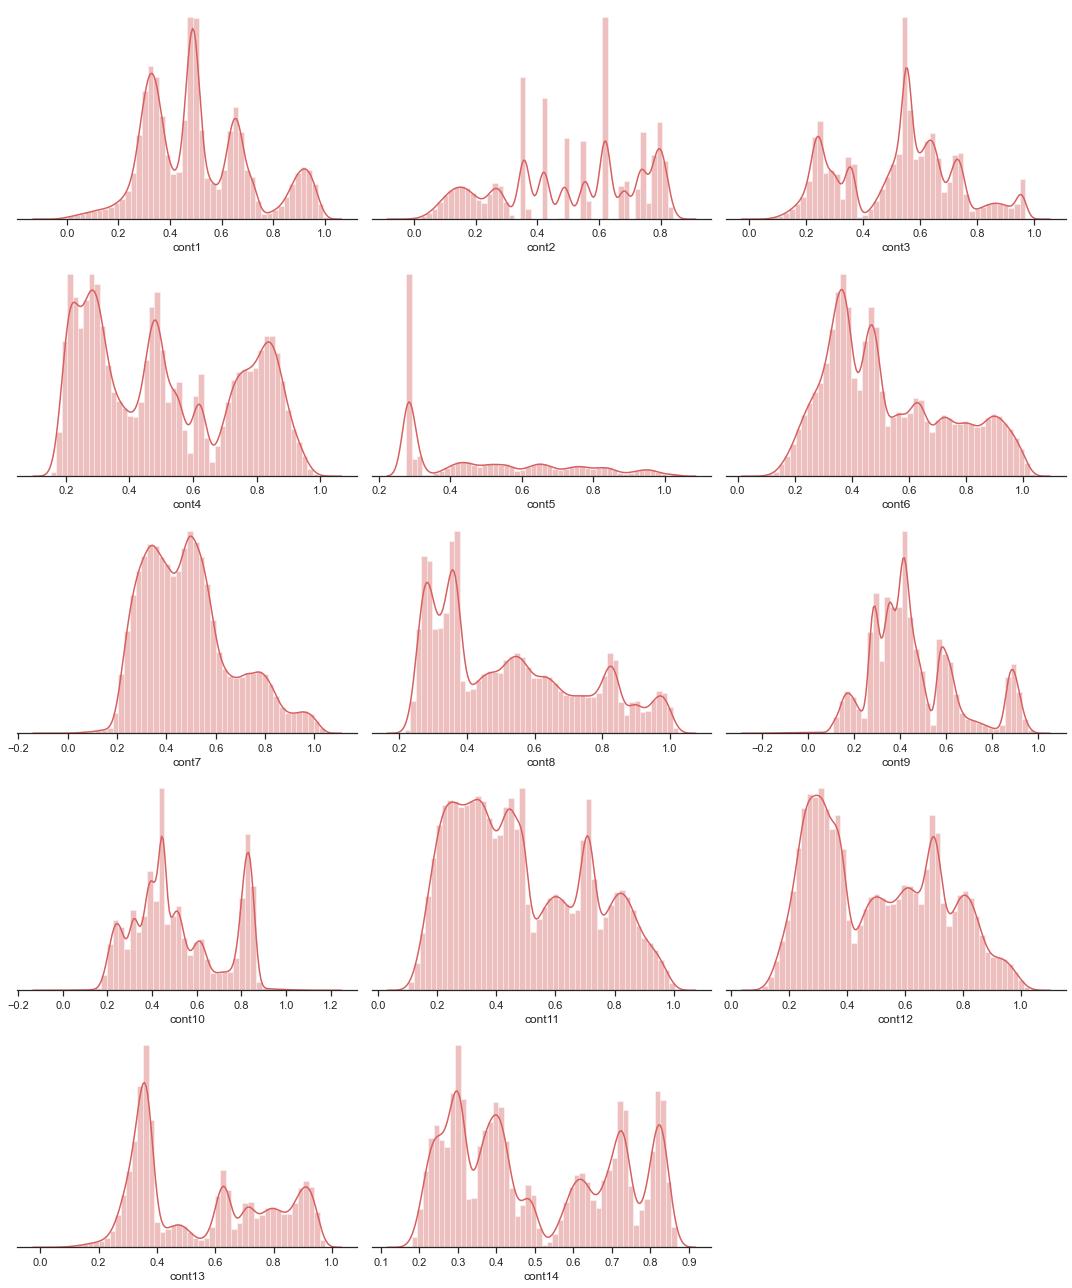

In [18]:
plt.figure(figsize = (15, 18))


for i in range(len(test.columns)):
    plt.subplot(5, 3, i+1)
    sns.despine(left=True)
    sns.distplot(train[test.columns[i]], color='r')
    plt.yticks([])
    plt.ylabel('')

plt.tight_layout()

### 4. Data Preprocessing

In [19]:
scaler = StandardScaler()

train_bigger_5  = train[train['target'] > 5]
train_scaled = scaler.fit_transform(train_bigger_5.drop('target', axis=1))
test_scaled = scaler.fit_transform(test)

train_scaled = pd.DataFrame(train_scaled, columns=train.drop('target', axis=1).columns)
test_scaled = pd.DataFrame(test_scaled, columns=test.columns)

In [20]:
X, y = train_scaled, train_bigger_5.target

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 5. Modeling

<b>5.1 Simple Models</b>

1) Linear Regression
2) Decision Tree Regressor
3) Random Forest Regressor
4) LGBM
5) XGBRegressor
6) CatBoost
7) AdaBoost

In [22]:
%%time

lin_reg = LinearRegression()
scores = cross_val_score(lin_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
lin_rmse_scores = np.sqrt(-scores)
print('Linear Regression performance:', lin_rmse_scores)

Linear Regression performance: [0.72422239 0.7288049  0.72407347 0.72629095 0.72629389]
Wall time: 1.46 s


In [23]:
%%time

tree_reg = DecisionTreeRegressor(random_state=0)
scores = cross_val_score(tree_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
tree_rmse_scores = np.sqrt(-scores)
print('Decision Tree Regressor performance:', tree_rmse_scores)

Decision Tree Regressor performance: [0.99935679 1.01014811 1.00686532 1.00591364 1.00821401]
Wall time: 21.8 s


In [24]:
%%time

forest_reg = RandomForestRegressor(random_state=42, n_jobs=2)
scores = cross_val_score(forest_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
forest_rmse_scores = np.sqrt(-scores)
print('Random Forest performance:', forest_rmse_scores)

Random Forest performance: [0.70793612 0.712374   0.70556024 0.70939336 0.71049553]
Wall time: 12min 9s


In [25]:
%%time

lgbm_reg = LGBMRegressor(random_state=42)
scores = cross_val_score(lgbm_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
lgbm_rmse_scores = np.sqrt(-scores)
print('LGBM performance:', lgbm_rmse_scores)

LGBM performance: [0.70198779 0.70575965 0.69959336 0.70346245 0.70371233]
Wall time: 4.63 s


In [26]:
%%time

xgb_reg = XGBRegressor(random_state=42)
scores = cross_val_score(xgb_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
xgb_rmse_scores = np.sqrt(-scores)
print('XGBoost performance:', xgb_rmse_scores)

XGBoost performance: [0.70532802 0.70757863 0.70119922 0.70546147 0.70575364]
Wall time: 1min 3s


In [27]:
%%time

cb_reg = CatBoostRegressor(random_state=42, verbose=False)
scores = cross_val_score(cb_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
cb_rmse_scores = np.sqrt(-scores)
print('CatBoost performance:', cb_rmse_scores)

CatBoost performance: [0.6995815  0.70225066 0.69616428 0.69985978 0.70079357]
Wall time: 1min 37s


In [28]:
%%time

ab_reg = AdaBoostRegressor(random_state=42)
scores = cross_val_score(ab_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
ab_rmse_scores = np.sqrt(-scores)
print('AdaBoost performance:', ab_rmse_scores)

AdaBoost performance: [0.72334178 0.72759255 0.72367432 0.72609959 0.72511322]
Wall time: 1min 34s


<b>5.2 Hyperparameter Tuning</b>

In [47]:
def objective(trial, train = train_bigger_5):
    
    X, y = train_bigger_5.drop('target', axis=1), train_bigger_5.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    
    param = {
        'tree_method':'gpu_hist',
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3, 0.4 ,0.5, 0.6, 0.7, 0.8, 0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4, 0.5, 0.6, 0.7, 0.8, 1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.008, 0.01, 0.014, 0.02]),
        'n_estimators': 2000,
        'max_depth': trial.suggest_categorical('max_depth', [5, 9, 13, 15, 17, 20]),
        'random_state': trial.suggest_categorical('random_state', [24, 48, 2020]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
    }
    model = XGBRegressor(**param)  
    
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=100, verbose=False)
    
    preds = model.predict(X_test)
    
    rmse = mean_squared_error(y_test, preds,squared=False)
    
    return rmse

In [48]:
%%time

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2021-01-18 18:38:15,014] A new study created in memory with name: no-name-1042b020-2908-472b-8e18-e9a81ddb81f0
[I 2021-01-18 18:39:07,564] Trial 0 finished with value: 0.6968750446194747 and parameters: {'colsample_bytree': 0.4, 'subsample': 0.4, 'learning_rate': 0.02, 'max_depth': 15, 'random_state': 48, 'min_child_weight': 71}. Best is trial 0 with value: 0.6968750446194747.
[I 2021-01-18 18:40:08,778] Trial 1 finished with value: 0.696116684310897 and parameters: {'colsample_bytree': 0.4, 'subsample': 0.6, 'learning_rate': 0.02, 'max_depth': 20, 'random_state': 24, 'min_child_weight': 286}. Best is trial 1 with value: 0.696116684310897.
[I 2021-01-18 18:42:24,370] Trial 2 finished with value: 0.6978490858404328 and parameters: {'colsample_bytree': 1.0, 'subsample': 0.7, 'learning_rate': 0.014, 'max_depth': 20, 'random_state': 48, 'min_child_weight': 44}. Best is trial 1 with value: 0.696116684310897.
[I 2021-01-18 18:42:43,945] Trial 3 finished with value: 0.7009970257802446 and 

Number of finished trials: 10
Best trial: {'colsample_bytree': 0.4, 'subsample': 0.6, 'learning_rate': 0.02, 'max_depth': 20, 'random_state': 24, 'min_child_weight': 286}
Wall time: 10min 21s


In [42]:
optuna.visualization.plot_param_importances(study)

In [35]:
Best_trial= {'lambda': 0.0030282073258141168, 'alpha': 0.01563845128469084, 'colsample_bytree': 0.5,
             'subsample': 0.7,'n_estimators': 500, 'learning_rate': 0.01,'max_depth': 15,
             'random_state': 2020, 'min_child_weight': 257,'tree_method':'gpu_hist', 'n_jobs' : 2}

In [46]:
best_trial

{'lambda': 0.00347353506301216,
 'alpha': 5.671136921051362,
 'colsample_bytree': 0.6,
 'subsample': 0.5,
 'learning_rate': 0.008,
 'max_depth': 17,
 'random_state': 2020,
 'min_child_weight': 254,
 'n_jobs': 2,
 'tree_method': 'gpu_hist'}

In [50]:
%%time

best_trial = study.best_trial.params
best_trial['n_jobs'] = 2
best_trial['tree_method'] = 'gpu_hist'

tuned_xgb_reg = XGBRegressor(**best_trial)
scores = cross_val_score(tuned_xgb_reg, train_bigger_5.drop('target', axis=1), train_bigger_5.target, scoring='neg_mean_squared_error', cv=5)
tuned_xgb_rmse_scores = np.sqrt(-scores)
print('Tuned XGBoost performance:', tuned_xgb_rmse_scores)
print('Difference between non-tuned and tuned:', xgb_rmse_scores.mean() - tuned_xgb_rmse_scores.mean())

Tuned XGBoost performance: [1.21315898 1.21635537 1.21295175 1.21636909 1.21264065]
Difference between non-tunde and tuned: -0.5092309712989578
Wall time: 19.5 s


<b>5.3 Predicting</b>

In [ ]:
tuned_xgb_reg = XGBRegressor(**Best_trial)
tuned_xgb_reg.fit(X, y)

In [ ]:
result = tuned_xgb_reg.predict(test_scaled)

In [ ]:
sample_submission.target = result

In [ ]:
sample_submission.to_csv('sample_submission.csv', index=False)